In [109]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
os.listdir(os.getcwd())
df = pd.read_csv("output_file.csv",  encoding = 'unicode_escape', engine ='python')
df_names = pd.read_csv("output_file_w_col_names.csv",  encoding = 'unicode_escape', engine ='python')
df_names

YEAR: GSS year for this respondent  ID: Respondent's ID number  \
0                                 2010.0                         1.0   
1                                 2010.0                         2.0   
2                                 2010.0                         3.0   
3                                 2010.0                         4.0   
4                                 2010.0                         5.0   
...                                  ...                         ...   
4896                              2010.0                      9577.0   
4897                              2010.0                      9578.0   
4898                              2010.0                      9579.0   
4899                              2010.0                      9580.0   
4900                              2010.0                      9581.0   

     WRKSTAT: Last week were you working full-time, part-time, going to school, keeping house, or what?  \
0                                     Working full-time                                                   
1                                     Working full-time                                                   
2                                               Retired                                                   
3                                               Retired                                                   
4                                               Retired                                                   
...                                                 ...                                                   
4896                                  Working full-time                                                   
4897                                            Retired                                                   
4898  With a job, but not at work because of tempora...                                                   
4899                                  Working full-time                                                   
4900                                            Retired                                                   

     HRS1: If working, full- or part-time, how many hours did you work last week, at all jobs?  \
0                                                    55                                          
1                                                    45                                          
2                                          Inapplicable                                          
3                                          Inapplicable                                          
4                                          Inapplicable                                          
...                                                 ...                                          
4896                                                 40                                          
4897                                       Inapplicable                                          
4898                                                  9                                          
4899                                                 40                                          
4900                                       Inapplicable                                          

     HRS2: If with a job, but not at work: How many hours a week do you usually work, at all jobs?  \
0                                          Inapplicable                                              
1                                          Inapplicable                                              
2                                          Inapplicable                                              
3                                          Inapplicable                                              
4                                          Inapplicable                                              
...                                                 ...            

In [3]:
for col in df_names.columns:
    if col.__contains__("nuclear"):
        print(col)

POLNUKE: Elected officials (How well elected officials know risk by nuclear power?)
BIZNUKE: Business leaders (How well business leaders know risk by nuclear power?)
ENGNUKE: Nuclear engineers (How well nuclear engineers know risk by nuclear power?)
ENGAGRNK: Please look at Card E14. (On a scale of 1 to 5, where 1 means 'Near complete agreement' and 5 means 'No agreement at all') to what extent do nuclear engineers agree on the risks and benefits of nuclear power to generate electricity?
ENHINFNK: Some say that the government should expand the use of nuclear power to generate electricity in the U.S. Others oppose any expansion in the use of nuclear power in this country. Please look at Card E15. How much influence should each of the following groups
POLINFNK: (Please look at Card E15. How much influence should each of the following groups have in deciding whether to expand the use of nuclear power? Elected officials. (Would you say . . .)
BIZINFNK: (Please look at Card E15. How much in

In [62]:
for col in df_names.columns:
    if col.__contains__("climate"):
        print(col)

TEMPGEN1: In general, do you think that a rise in the world's temperature caused by climate change is extremely dangerous for the environment, very dangerous, somewhat dangerous, not very dangerous, or not dangerous at all for the environment?


In [18]:
nuke_str = "NUKEELEC"
for col in df.columns:
    #print(df['NUKEELEC'])
    pass

In [87]:
import pyreadstat
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/thearda-General-Social-Survey-2010/SPSS/")
df_sav, meta = pyreadstat.read_sav("General Social Survey 2010 Cross-Section and Panel Combined.SAV", user_missing=True, apply_value_formats=True)
df_sav['TEMPGEN1']

0                                    Don't know
1       Extremely dangerous for the environment
2                                    Don't know
3                                Very dangerous
4                                  Inapplicable
                         ...                   
4896                                        NaN
4897                                        NaN
4898                                        NaN
4899                                        NaN
4900                                        NaN
Name: TEMPGEN1, Length: 4901, dtype: category
Categories (8, object): ['Don't know', 'Extremely dangerous for the environment', 'Inapplicable', 'No answer', 'Not dangerous at all for the environment', 'Not very dangerous', 'Somewhat dangerous', 'Very dangerous']

In [150]:
df_sav['PRESTG80']

0                        65
1                        64
2                        32
3       Don't know, NA, IAP
4                        36
               ...         
4896                     74
4897                     22
4898                     44
4899                     34
4900                     74
Name: PRESTG80, Length: 4901, dtype: category
Categories (59, object): ['17', '19', '20', '21', ..., '74', '75', '86', 'Don't know, NA, IAP']

In [12]:
print(meta.missing_user_values)

{}


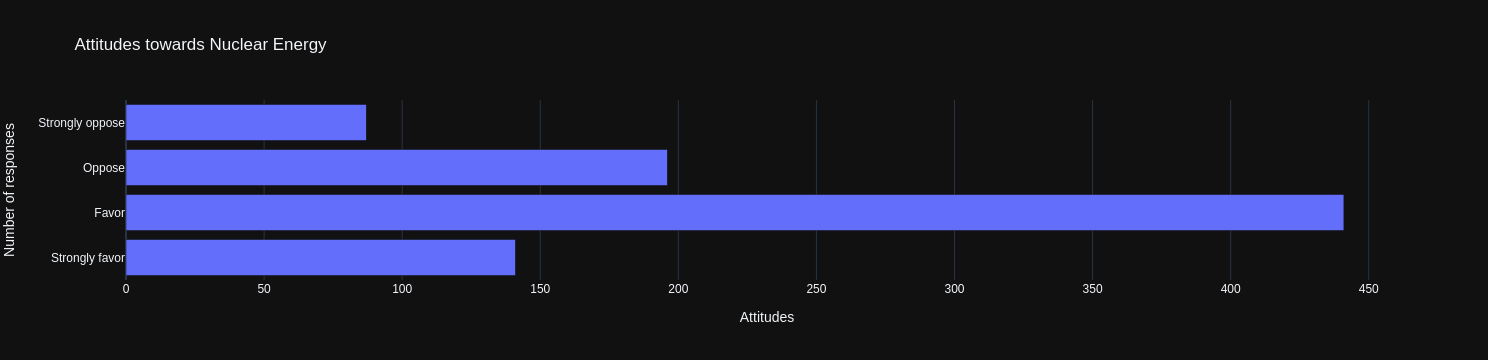

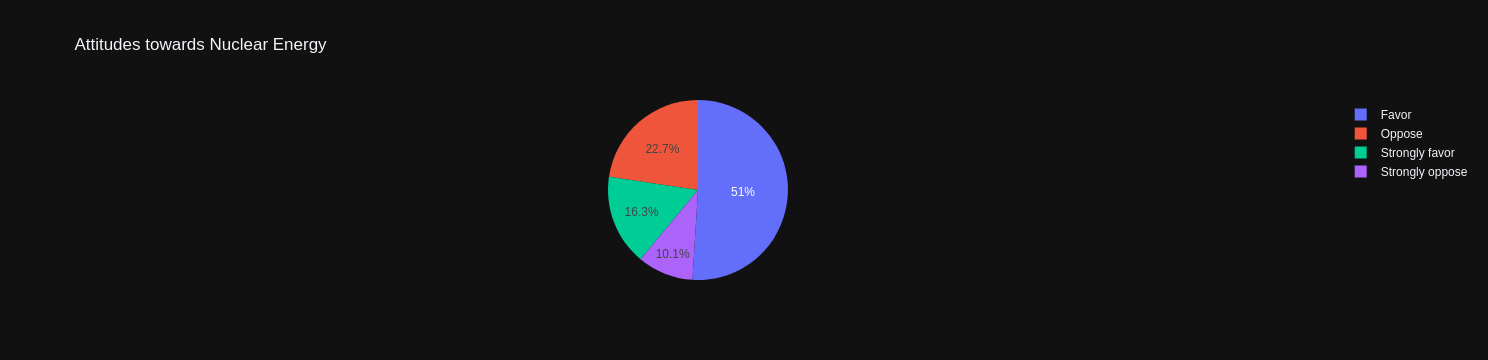

In [4]:
import plotly.express as px
my_dict = {'Inapplicable':0,
           'Strongly favor':0,
           'Favor':0,
           'Oppose':0,
           'Strongly oppose':0,
           "Don't know":0,
           'No answer':0
          }
'''
0) Inapplicable	3930	80.2
1) Strongly favor	141	2.9
2) Favor	441	9.0
3) Oppose	196	4.0
4) Strongly oppose	87	1.8
8) Don't know	96	2.0
9) No answer	10	0.2
'''
for i in df_sav['NUKEELEC']:
    
    if i == 0:
        my_dict['Inapplicable'] += 1
    elif i == 1:
        my_dict['Strongly favor'] += 1
    elif i == 2:
        my_dict['Favor'] += 1
    elif i == 3:
        my_dict['Oppose'] += 1
    elif i == 4:
        my_dict['Strongly oppose'] += 1
    elif i == 5:
        my_dict["Don't know"] += 1
    elif i == 6:
        my_dict["No answer"] += 1   
    pass

#Not sure why so many are Inapplicable
my_dict.pop('Inapplicable')
my_dict.pop('No answer')
my_dict.pop("Don't know")

fig = px.bar(x = my_dict.values(), y = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()
fig = px.pie(values = my_dict.values(), names = my_dict.keys(), title="Attitudes towards Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()

["('Oppose', 'Very dangerous')",
 "('Strongly oppose', 'Extremely dangerous for the environment')",
 "('Favor', 'Very dangerous')",
 "('Favor', 'Somewhat dangerous')",
 "('Oppose', 'Somewhat dangerous')",
 "('Strongly favor', 'Not dangerous at all for the environment')",
 "('Favor', 'Extremely dangerous for the environment')",
 "('Oppose', 'Extremely dangerous for the environment')",
 "('Strongly oppose', 'Very dangerous')",
 "('Strongly favor', 'Extremely dangerous for the environment')",
 "('Strongly favor', 'Somewhat dangerous')",
 "('Favor', 'Not very dangerous')",
 "('Favor', 'Not dangerous at all for the environment')",
 "('Strongly favor', 'Very dangerous')",
 "('Strongly favor', 'Not very dangerous')",
 "('Strongly oppose', 'Somewhat dangerous')",
 "('Oppose', 'Not very dangerous')",
 "('Strongly oppose', 'Not very dangerous')"]


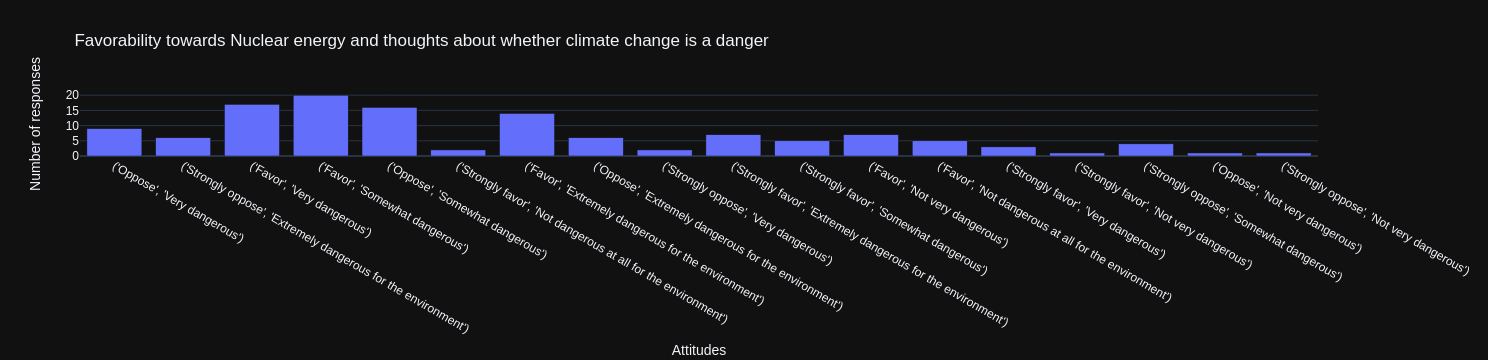

In [21]:
import math
import plotly.express as px
import pprint

'''
TEMPGEN1
0) Inapplicable	614	30.0
1) Extremely dangerous for the environment	286	14.0
2) Very dangerous	364	17.8
3) Somewhat dangerous	416	20.4
4) Not very dangerous	181	8.9
5) Not dangerous at all for the environment	78	3.8
8) Don't know	100	4.9
9) No answer	5	0.2
'''
climate_nuclear_dict = {}


for ind in df.index:
    #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
    if (df['NUKEELEC'][ind], df['TEMPGEN1'][ind]) not in climate_nuclear_dict:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] = 1
    else:
        climate_nuclear_dict[(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])] += 1
    #if "favor" in df_sav['NUKEELEC'][ind]:
        #print(df['NUKEELEC'][ind], df['TEMPGEN1'][ind])
        #pass
    pass


climate_nuclear_dict_short = {}


# These values are unless. Inapplicable also makes up a LARGE amount of responses.
for key, value in climate_nuclear_dict.items():
    if "Inapplicable" not in key and "Don't know" not in key and "No answer" not in key:
        if not pd.isna(key[1]):
            climate_nuclear_dict_short[key] = value
        pass

'''
NOTE: MANY values in TEMPGEN1 (climate change thoughts were MISSING from the study. 
Not sure why, but I've checked it the multiple file formats they gave me

'''
climate_nuclear_dict_copy = climate_nuclear_dict_short.copy()

freq_list = list(climate_nuclear_dict_short.values())
combos_list = list(climate_nuclear_dict_short.keys())

#pprint.pprint(freq_list)

for index, a in enumerate(combos_list):
    combos_list[index] = str(a)

pprint.pprint(combos_list)    

fig = px.bar(x = combos_list, y = freq_list, title="Favorability towards Nuclear energy and thoughts about whether climate change is a danger", template='plotly_dark').update_layout(
xaxis_title="Attitudes", yaxis_title="Number of responses"
)
fig.show()

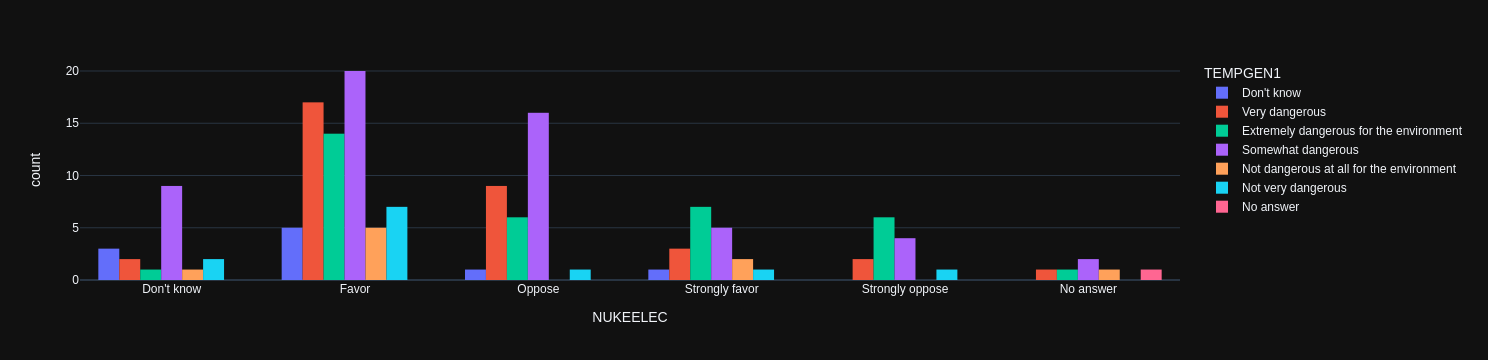

In [154]:
# This might be a better way to display the above data

# drop all Inapplicable
df_clean_nuke = df.copy()
df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
df_clean_nuke = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

fig = px.histogram(df_clean_nuke, x="NUKEELEC", color="TEMPGEN1", barmode="group", template='plotly_dark')
fig.show()

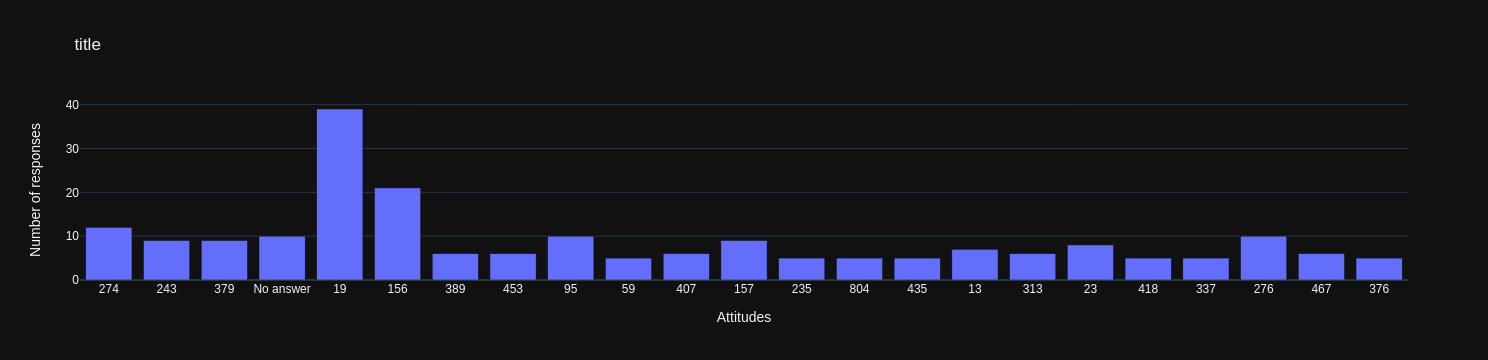

In [69]:
import collections

# Respondent's occupation
# occupation code in PDF
col_code = "OCC80"
strongly_favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Strongly favor":
        #print(df['NUKEELEC'][i])
        if df[col_code][i] not in strongly_favor_occup:
            strongly_favor_occup[df[col_code][i]] = 1
        else:
            strongly_favor_occup[df[col_code][i]] += 1

favor_occup = {}
for i in df.index:
    if df['NUKEELEC'][i] == "Favor":
        if df[col_code][i] not in favor_occup:
            favor_occup[df[col_code][i]] = 1
        else:
            favor_occup[df[col_code][i]] += 1
            
favor_occup_short = {}

for key, value in favor_occup.items():
    if value > 4:
        favor_occup_short[key] = value
        
fig = px.bar(x = favor_occup_short.keys(), y = favor_occup_short.values(), title="Jobs which Favor Nuclear Energy", template='plotly_dark').update_layout(
xaxis_title="Job types (code)", yaxis_title="Number of responses"
)
fig.show()

#len(strongly_favor_occup)
#strongly_favor_occup
#favor_occup
#favor_occup_short

# count frequency of jobs
#count = collections.Counter(df[col_code])
#res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

In [77]:
# Spouse's occupational prestige (See Note 2: Occupational Prestige and Socioeconomic Index Scores on ARDA summary page)
col_code = 'SPPRES80'
# Respondent's occupational prestige
col_code = 'PRESTG80'

count = collections.Counter(df[col_code])
res = {key: val for key, val in sorted(dict(count).items(), key = lambda ele: ele[1], reverse = True)}
#res

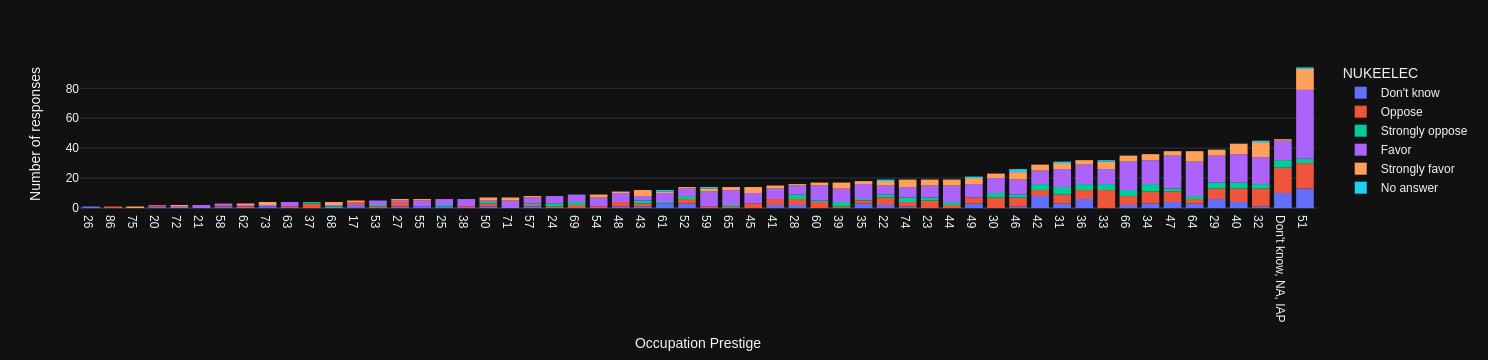

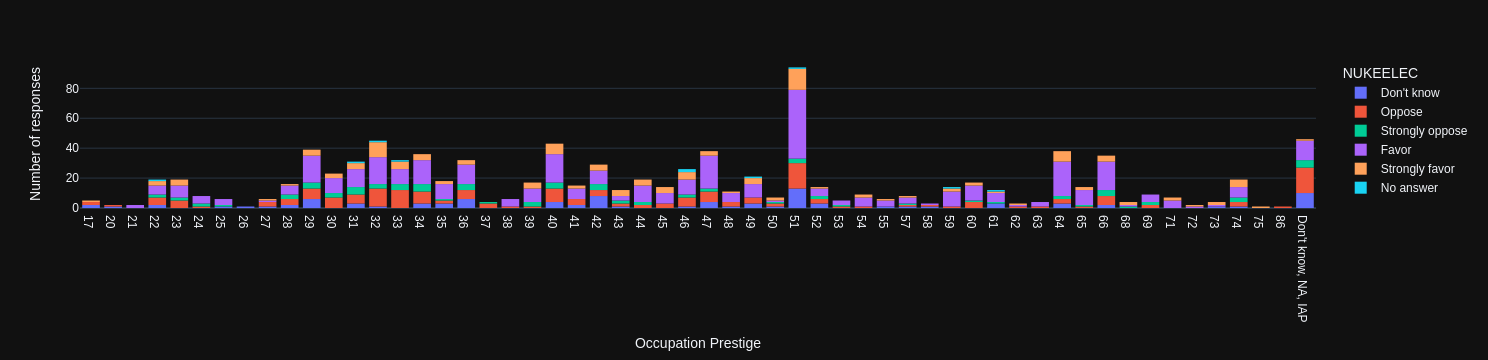

In [130]:
import plotly.express as px

# Sort the amount of favorability of nuclear energy based on occupation prestige

df_clean_nuke = df.copy()

# drop all Inapplicable
index_names = df_clean_nuke[ df_clean_nuke['NUKEELEC'] == 'Inapplicable' ].index
df_clean_nuke.drop(index_names, inplace = True)

fig = px.histogram(df_clean_nuke, x="PRESTG80", color="NUKEELEC", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Occupation Prestige", yaxis_title="Number of responses"
)
fig.show()
# category ascending
fig = px.histogram(df_clean_nuke, x="PRESTG80", color="NUKEELEC", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Occupation Prestige", yaxis_title="Number of responses"
)
fig.show()

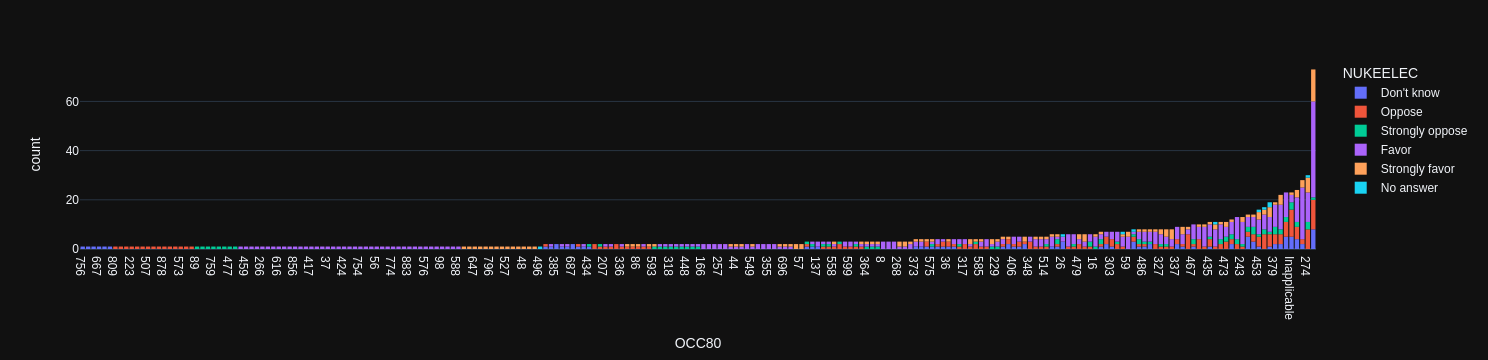

In [131]:
# R's occupation
fig = px.histogram(df_clean_nuke, x="OCC80", color="NUKEELEC", template='plotly_dark').update_xaxes(categoryorder='total ascending')
fig.show()

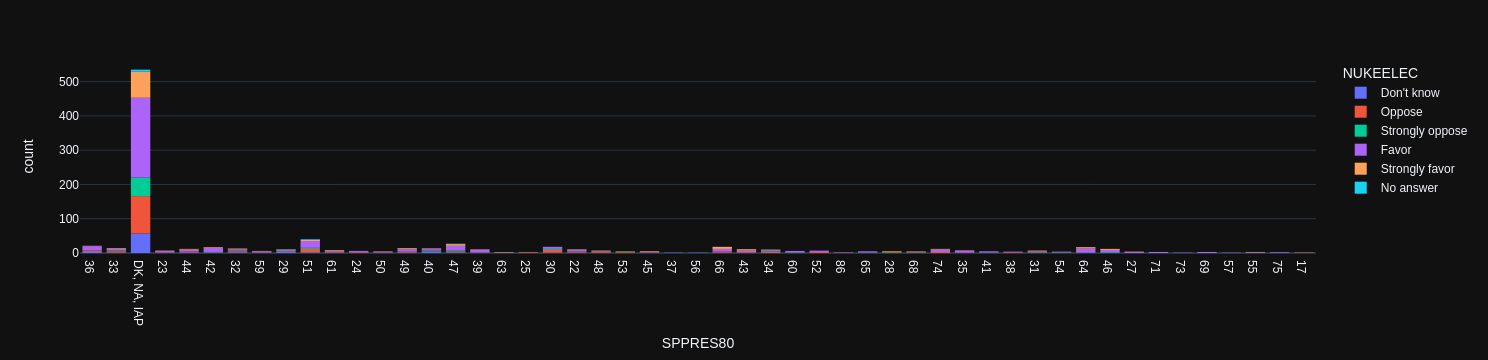

In [132]:
fig = px.histogram(df_clean_nuke, x="SPPRES80", color="NUKEELEC", template='plotly_dark')
fig.show()

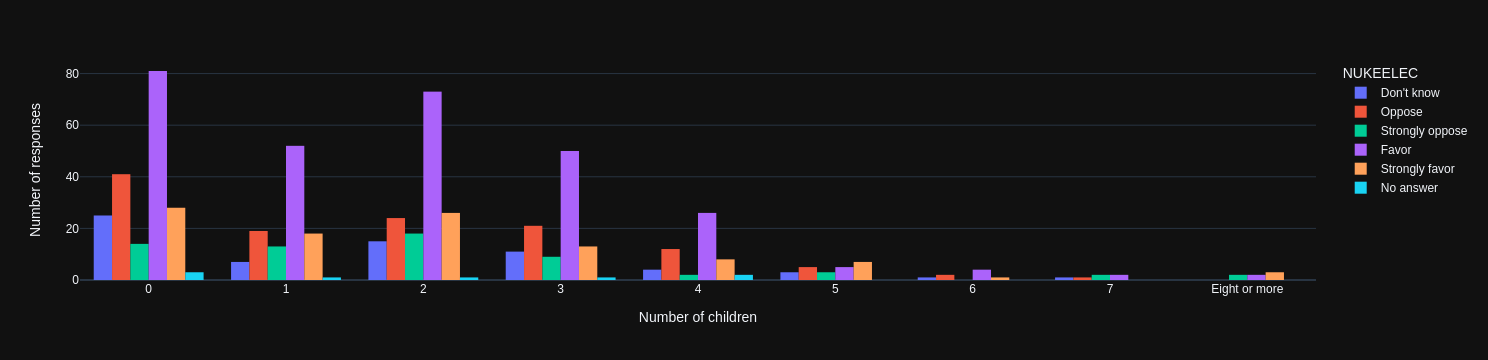

In [160]:
# drop all Inapplicable
df_clean_nuke = df.copy()
df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
df_clean_nuke = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']

# CHILDS

fig = px.histogram(df_clean_nuke, x="CHILDS", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

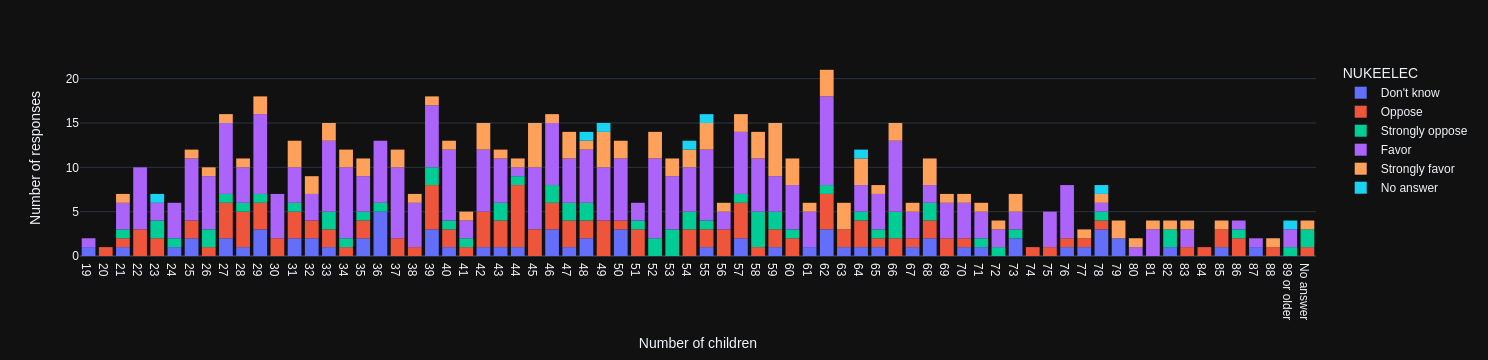

In [136]:
# Age

fig = px.histogram(df_clean_nuke, x="AGE", color="NUKEELEC", template='plotly_dark').update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

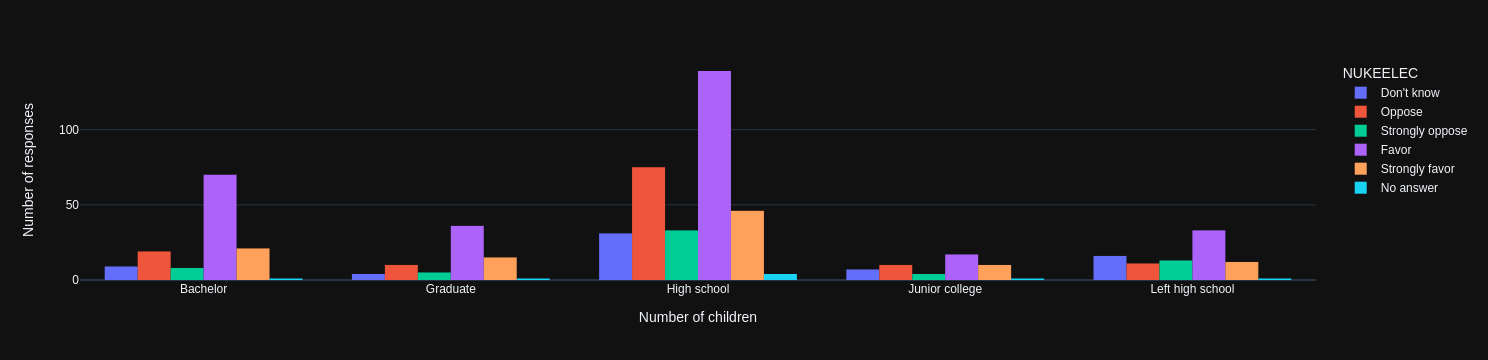

In [141]:
# DEGREE

fig = px.histogram(df_clean_nuke, x="DEGREE", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

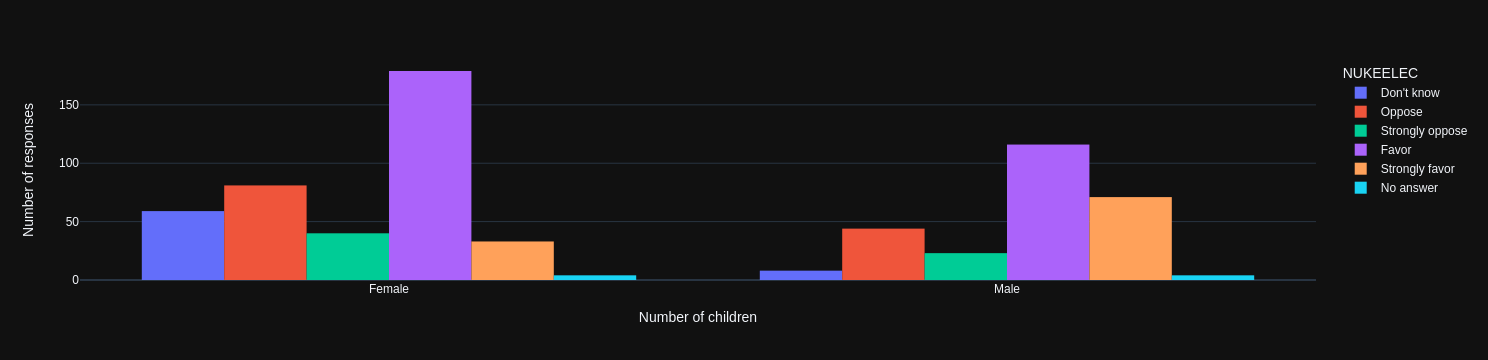

In [142]:
# SEX

fig = px.histogram(df_clean_nuke, x="SEX", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

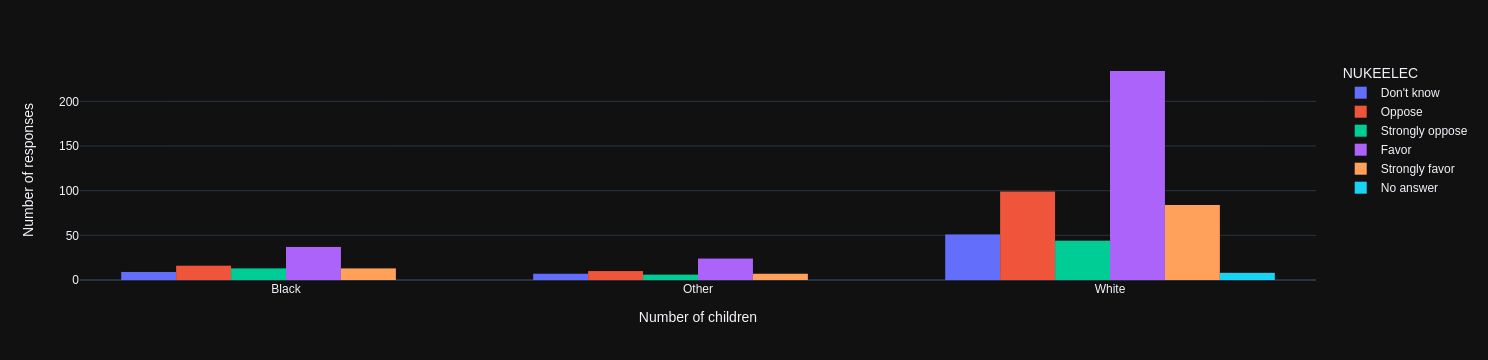

In [143]:
# RACE

fig = px.histogram(df_clean_nuke, x="RACE", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='category ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

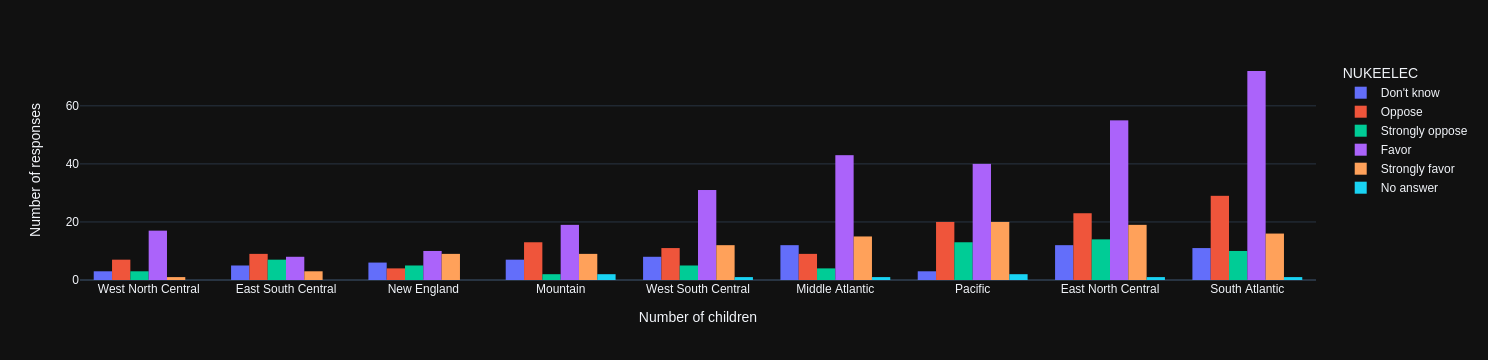

In [146]:
# REGION

fig = px.histogram(df_clean_nuke, x="REGION", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

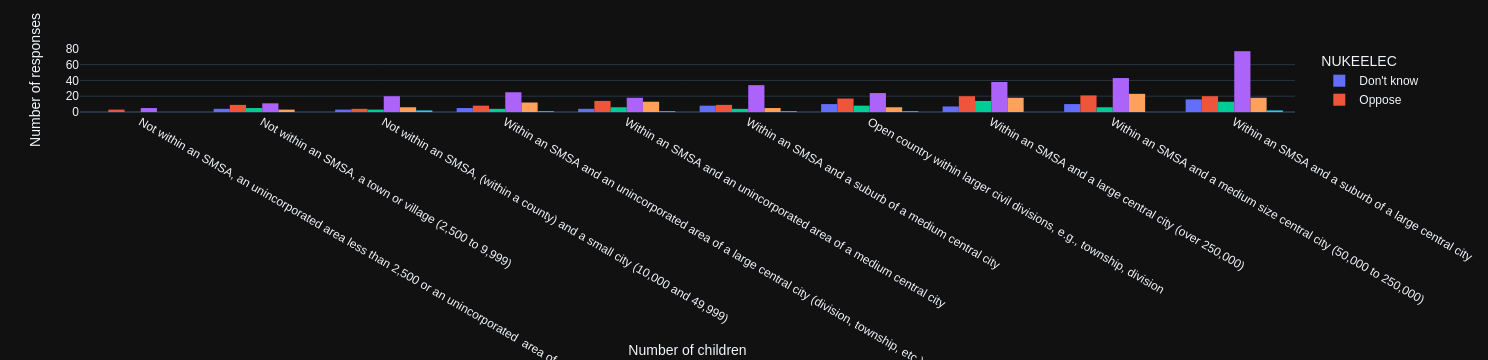

In [147]:
# XNORCSIZ
fig = px.histogram(df_clean_nuke, x="XNORCSIZ", color="NUKEELEC", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()

/tmp/ipykernel_598912/4234939088.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_598912/4234939088.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_598912/4234939088.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



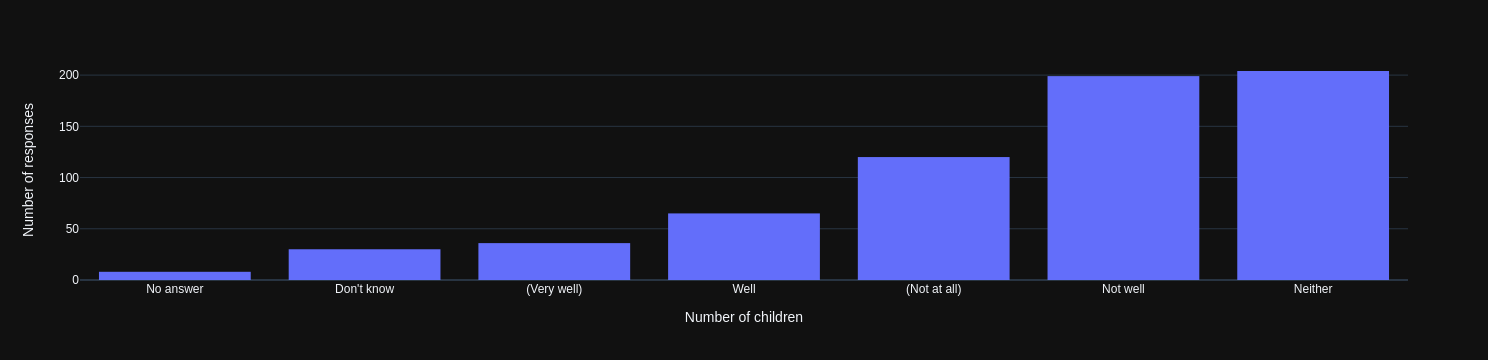

In [168]:
# POLNUKE
# Elected officials (How well elected officials know risk by nuclear power?)

'''
0) Inapplicable	1578	61.9
1) (Very well)	49	1.9
2)	90	3.5
3)	301	11.8
4)	307	12.0
5) (Not at all)	169	6.6
8) Don't know	44	1.7
9) No answer	11	0.4
'''
# drop all Inapplicable
df_clean_nuke = df.copy()
df_clean_nuke = df_clean_nuke[df_clean_nuke.NUKEELEC != 'Inapplicable']
df_clean_nuke = df_clean_nuke[df_clean_nuke.TEMPGEN1 != 'Inapplicable']


for ind in df_clean_nuke.index:
    if df_clean_nuke['POLNUKE'][ind] ==  "2":
        df_clean_nuke['POLNUKE'][ind] = "Well"
    if df_clean_nuke['POLNUKE'][ind] ==  "3":
        df_clean_nuke['POLNUKE'][ind] = "Neither"
    if df_clean_nuke['POLNUKE'][ind] ==  "4":
        df_clean_nuke['POLNUKE'][ind] = "Not well"
    
fig = px.histogram(df_clean_nuke, x="POLNUKE", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Number of children", yaxis_title="Number of responses"
)
fig.show()